<a href="https://colab.research.google.com/github/DreamCookie/projsch/blob/main/Eeeexperiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y git

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git is already the newest version (1:2.25.1-1ubuntu3.11).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [ ]:
!pip install -r requirements.txt

In [ ]:
#@title
# git init: Инициализирует новый Git-репозиторий в текущем каталоге. Он создает скрытую папку .git для хранения информации, связанной с Git.

# git clone [URL репозитория]: Копирует существующий репозиторий с GitHub на вашу локальную машину. URL репозитория можно найти на странице GitHub репозитория, который вы хотите клонировать.

# git add [file]: Добавляет файл или изменения в область хранения, подготавливая их к следующей фиксации. Вы можете указать один файл, несколько файлов или использовать подстановочный знак (*) для добавления всех изменений.

# git commit -m "[сообщение фиксации]": Создает новый коммит с изменениями, которые вы добавили в область хранения. Сообщение коммита должно представлять собой краткое описание внесенных изменений.

# git push: Загружает ваши локальные коммиты в удаленный репозиторий на GitHub. Обычно это используется для того, чтобы поделиться своими изменениями с другими или для поддержания удаленного репозитория в актуальном состоянии.

# git pull: Обновляет ваш локальный репозиторий последними изменениями из удаленного репозитория. Это полезно, когда вы хотите синхронизировать свою локальную копию с изменениями, внесенными другими.

# git branch: Выводит список всех ветвей в  репозитории. Ветка - это как отдельная линия разработки, позволяющая одновременно работать над разными функциями или версиями.

# git checkout [имя ветки]: Переключает на другую ветку в  хранилище. Вы можете создать новую ветку, используя git checkout -b [имя новой ветки].

# git merge [имя ветки]: Объединяет изменения из указанной ветки в текущую ветку. Обычно используется для интеграции изменений, сделанных в отдельных ветках.

# git pull origin [имя ветки]: Получает последние изменения из удаленного репозитория и объединяет их в указанную ветку. Это комбинация git pull и git merge.

**ВАРИАНТ 1, КРАСИВЕЕ, НО НЕ РАБОТАЕТ КАК НАДО**

In [ ]:
import pandas as pd
import numpy as  np
from yandex_geocoder import Client
from geopy.distance import geodesic
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import geopy.distance
import ast
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('coordinates.csv')
df

,LegalAddress,Coordinates
0,"115598, ГОРОД МОСКВА, УЛИЦА ЛИПЕЦКАЯ, 15, 2","(('37.688782'), ('55.581062'))"
1,"121615, город Москва, Рублевское шоссе, дом 24...","(('37.428935'), ('55.745129'))"
2,"123181, ГОРОД МОСКВА, УЛИЦА ИСАКОВСКОГО, 29, 1","(('37.41944'), ('55.806803'))"
3,"121354, город Москва, Можайское ш., д.38, корп.7","(('37.411535'), ('55.721021'))"
4,"117279, ГОРОД МОСКВА, УЛИЦА ВВЕДЕНСКОГО, 28","(('37.532331'), ('55.636361'))"
...,...,...
492,"111538, ГОРОД МОСКВА, УЛИЦА КОСИНСКАЯ, 24А","(('37.829557'), ('55.718456'))"
493,"105203, г. Москва, улица Первомайская, дом 111","(('37.814726'), ('55.793915'))"
494,"107207, ГОРОД МОСКВА, ШОССЕ ЩЁЛКОВСКОЕ, 77А","(('37.804036'), ('55.813319'))"
495,"105005, ГОРОД МОСКВА, ТУПИК КОНДРАШЕВСКИЙ, ДОМ 3А","(('37.688018'), ('55.768213'))"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   LegalAddress  497 non-null    object
 1   Coordinates   497 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB


In [ ]:
# Преобразование столбца "Coordinates" из строкового формата в кортеж плавающих значений
df['Coordinates'] = df['Coordinates'].apply(lambda x: tuple(map(float, ast.literal_eval(x))))

In [ ]:
# массив координат и список адресов
array = df['Coordinates'].tolist()
addresses = df['LegalAddress'].tolist()

In [ ]:
# координаты пользователя

# ключ к апи
client = Client("0f648b4c-4790-4e45-9195-b016a7729abf")

a = input('Введите свой адрес в формате улица дом:')
print('Адрес:', a)
# координаты пользователя
coordinates = client.coordinates(a)
print('Координаты', coordinates)


Введите свой адрес в формате улица дом:115598, ГОРОД МОСКВА, УЛИЦА ЛИПЕЦКАЯ, 15, 1
Адрес: 115598, ГОРОД МОСКВА, УЛИЦА ЛИПЕЦКАЯ, 15, 1
Координаты (Decimal('37.687237'), Decimal('55.581581'))


In [ ]:
# # Перевод столбца Coordinates в массив значений
# cord = pd.read_csv('coordinates.csv')
# coord_list = [ast.literal_eval(coord) for coord in cord['Coordinates']]

# Distance до каждой "локации"
distances = [geodesic(coordinates, coord).km for coord in array]

In [ ]:
# Prepare data for KNN
X = np.array(distances).reshape(-1, 1)
y = np.zeros(len(distances))

# Normalize parameters
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
# Set up the parameter grid
param_grid = {'n_neighbors': np.arange(1, 50), 'weights': ['uniform', 'distance']}

In [ ]:
# Instantiate the grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid)

# Fit the grid search
grid_search.fit(X_scaled, y)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'],
                           weights=grid_search.best_params_['weights'])
knn.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
# Predict
prediction = knn.predict(X_scaled)

# Map prediction to addresses
predicted_addresses = [address for address, pred in zip(addresses, prediction) if pred == 1]
print('Предсказанные адреса:', predicted_addresses)

Предсказанные адреса: []


________________________________________________________________________________

**ВАРИАНТ 2, БОЛЕЕ СТАРЫЙ, НО С ВИДУ РАБОТАЕТ**

In [ ]:
# Initialize the geocoder client
client = Client("0f648b4c-4790-4e45-9195-b016a7729abf")

# User's coordinates
a = input('Введите свой адрес в формате улица дом:')
print('Адрес:', a)
coordinates = client.coordinates(a)
print('Координаты', coordinates)

# Read and process coordinates data
cord = pd.read_csv('coordinates.csv')
coord_list = [ast.literal_eval(coord) for coord in cord['Coordinates']]

# Calculate distances
distances = [geodesic(coordinates, coord).km for coord in coord_list]

# Now distances[i] corresponds to the distance to the i-th coordinate

# Example: print distance to the 3rd coordinate
print(distances[3])

# Schools' attributes (replace these with your actual data)
workload = [90 for _ in range(497)]  # workload percentages for each school
feedback = [5 for _ in range(497)]   # feedback scores for each school

# Importance of attributes
weights = [1, 0.3, 0.5]

# Parameters for schools
X = np.array([distances, workload, [5 - f for f in feedback]]).T
y = list(range(len(distances)))

# Normalize parameters
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_w = X_scaled * np.array(weights)

# Train classifier
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_w, y)

print('Лучший результат', neigh.predict_proba([[0,0,0]]))

Введите свой адрес в формате улица дом:115598, ГОРОД МОСКВА, УЛИЦА ЛИПЕЦКАЯ, 15, 1
Адрес: 115598, ГОРОД МОСКВА, УЛИЦА ЛИПЕЦКАЯ, 15, 1
Координаты (Decimal('37.687237'), Decimal('55.581581'))
32.987340709963604
Лучший результат [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
pred_index = neigh.predict([[0,0,0]])

In [ ]:
predicted_address = cord['LegalAddress'][pred_index[0]]
print('Predicted Address:', predicted_address)

Predicted Address: 115598, ГОРОД МОСКВА, УЛИЦА ЛИПЕЦКАЯ, 15, 2


________________________________________________________________________________

In [ ]:
#@title
#  расчет расстояний

# Попытка создать цикл, который создаёт пременные coord[i] и dist[i].
# В переменные координат помещаю значения из ранее созданного массива
# В переменные дистанции помещаю расстояние между coordinates(координаты пользователя) и coord[i]
for i in range (0, 497):
    locals()[f"coord{i}"] = array[i]
    #locals()[f"dist{i}"] = geodesic(coordinates, coord[i]).km - Хочу, чтобы так работало, но оно совсем не работает
print(coord3) # Проверка на то, какое значение вообще присваивается переменной


coordinates1 =  (('37.688782'), ('55.581062')) # Ради проверки присваиваю вручную значение, аналогичное тем, сто в таблице
coordinates3 = coord3 # И для сравнения значение полученное из цикла

dist_1=geopy.distance.geodesic(coordinates, coordinates1).km
print(dist_1) # Данный пример работает

dist_3=geopy.distance.geodesic(coordinates, coordinates3).km
print(dist_3) # А данный нет

### Далее идёт ваш код почти без изменений
#### Можете поиграться, потому что тут ничего не берётся из данных выше, занялась больше оформлением
##### Покоя не даёт мне алгоритм поиска соседей. Что-то как будто бы совсем не то...

Расстояния: 2.726562235811725
1.7593703232287021
0.29255925403145655
Заполненность: 77.82963743827771 77.80737078801913 97.38651212530553
Рейтинг: 0.6865033027124832 4.807212114410666 1.7922028352990047


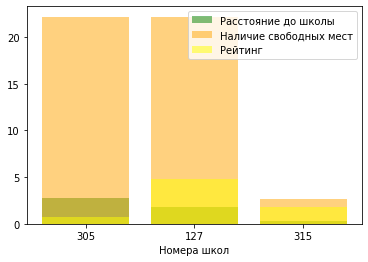

In [ ]:
#  расчет расстояний
import random
import matplotlib.pyplot as plt
dist_1 = random.random() * 3
print('Расстояния:', dist_1)
dist_2 = random.random() * 3
print(dist_2)
dist_3 = random.random() * 3
print(dist_3)

# Аттрибуты школ
workload_1, workload_2, workload_3 = (random.random() * (101 - 41) + 41), (random.random() * (101 - 41) + 41), (random.random() * (101 - 41) + 41)
print('Заполненность:', workload_1, workload_2, workload_3)
feedback_1, feedback_2, feedback_3 = random.random() * 6, random.random() * 6, random.random() * 6
print('Рейтинг:', feedback_1, feedback_2, feedback_3)


dist = [dist_1, dist_2, dist_3]
sch = ['305', '127', '315']
occ= [100 - workload_1, 100-workload_2, 100-workload_3]
rate = [feedback_1, feedback_2, feedback_3]

plt.bar(sch, dist, color = 'green', label='Расстояние до школы', alpha=0.5)
plt.bar(sch, occ, color = 'orange', label='Наличие свободных мест', alpha=0.5)
plt.bar(sch, rate, color = 'yellow', label='Рейтинг', alpha=0.5)
plt.xlabel('Номера школ')
plt.legend()
plt.show()

In [ ]:
import ipywidgets as widgets
from IPython.display import display

# важность
print('Оцените приоритетность дальности школы от 0 до 10:')
slider1 = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='',
    value=0)
display(slider1)

print('Оцените приоритетность заполненности школы от 0 до 10:')
slider2 = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='',
    value=0)
display(slider2)

print('Оцените приоритетность рейтинга школы от 0 до 10:')
slider3 = widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='',
    value=0)
display(slider3)


Оцените приоритетность дальности школы от 0 до 10:


IntSlider(value=0, max=10)

Оцените приоритетность заполненности школы от 0 до 10:


IntSlider(value=0, max=10)

Оцените приоритетность рейтинга школы от 0 до 10:


IntSlider(value=0, max=10)

In [ ]:
d = slider1.value/10
print(d)
w = slider2.value/10
print(w)
f = slider3.value/10
print(f)

0.2
0.9
0.3


In [ ]:
weights = [d, w, f]

# параметры школ
school_1 = [dist_1, workload_1, 5-feedback_1]
school_2 = [dist_2, workload_2, 5-feedback_2]
school_3 = [dist_3, workload_3, 5-feedback_3]

X = np.array([school_1, school_2, school_3])
y = [0, 1, 2]

# Нормализация
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

X_w = X_scaled*np.array(weights).T

In [ ]:
# Обучение классифкатора
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(X_w, y)

print('Лучший результат', neigh.predict_proba([[0,0,0]]))

Лучший результат [[0. 1. 0.]]
